# Machine Learning Engineer Nanodegree
## Capstone Project
Jun Yan  
Jan 15, 2017

## I. Definition (Todo)
_(approx. 1-2 pages)_

### Project Overview
Lendingclub.com is one of the leading online p2p lending platforms, where lenders are matched directly to borrowers. Since its inception in 2007, the total amount of loan reaches almost 8 billion US dollars. There are two ways to invest on lendingclub.com: automatic investing and manual investing. In automatic investing, investors specify the amount of risk they are willing to take, and lendingclub automatically invest their money in a mixed portfolio constructed using their algorithms given the risk. For manual investing, investors can browse the notes and the borrowers' information, and select which notes and how much amount they would like to invest. Furthermore, investors don't necessarily have to browser all the notes, instead they can download those data, use their own algorithm to identify which borrowers to lend their money and process them in a batch fashion. Lendingclub provides historical loan information so that one can build machine learning algorithms to predict loan performances. This project aims at identifying loans that may default so that borrowers can avoid those loans using manual investing. 

There have been many similar efforts at predicting defaults using lendingclub data [1-7]. Although the goal of predicting default is the same, there are differences in feature selection, learning algorithms employed and metrics used for evaluating the model performance. In particular, some of the high performing models (for example, Ref [1]) incorrectly used fico scores that were produced after a loan is default, thus the results are highly misleading. Other analysis [2-7] use only numerical and categorical features but ignoring text. The most comprehensive feature engineering effort comes from Ref. [8], however, they use a different dataset and their goal is to report whether a loan defaults and how much is the loss if a loan defaults. 

### Problem Statement
In this project, I propose to predict whether a borrower will default so that investors can avoid those borrowers using manual investing feature provided by lendingclub. This, however, does not necessarily lead to highest return on investment (ROI) because by completely avoiding potential defaults, one also avoid riskier loans that may lead to higher ROI even though they default at some point in the future. In order to maximize ROI, one needs to optimize ROI instead. In this project, we work on the simpler problem, that is to predict loan defaults.

Predicting loan defaults is a binary classification problem: a borrower either default at some time during the loan term or finish payment. In reality, the majority of lendingclub loans are between default and full payment, that is, these loans are on-going. Since investors can only invest in lendingclub notes at initial stage, which means investor can not jump into on-going loans, those on-going loans are irrelevant to our discussion. A binary classification problem is a classic machine learning problem with multiple machine learning algorithms to choose from, has quantitative metrics, such as accuracy, precision, f1 score, etc. to measure the results, and is replicable with the same data and machine learning model.


### Metrics

## II. Analysis
_(approx. 2-4 pages)_

### Data Exploration
The dataset comes from lendingclub website `DOWNLOAD LOAN DATA` section: https://www.lendingclub.com/info/download-data.action. According to the website, these files contain complete loan data for all loans issued from 2007 through 2016 Q3. In the following, I will load the dataset and present basic information and statistics.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_rows = 200
pd.options.display.max_columns = 200

In [2]:
# load data
RawData = pd.read_csv('data/LoanStats3a_securev1.csv', header=1)
for f in (['data/LoanStats3b_securev1.csv', 'data/LoanStats3c_securev1.csv', 'data/LoanStats3d_securev1.csv', 
             'data/LoanStats_securev1_2016Q1.csv', 'data/LoanStats_securev1_2016Q2.csv', 
              'data/LoanStats_securev1_2016Q3.csv']):
    tmp = pd.read_csv(f, header=1, low_memory=False)
    RawData = RawData.append(tmp)

/Users/bdcoe/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (0,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print RawData.shape

(1218316, 115)


In [4]:
RawData.head(1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000,Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-1985,735,739,1,NaN,NaN,3,0,13648,83.7%,9,f,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-2015,171.62,NaN,Oct-2016,744,740,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN


#### Basic information
According to the above analysis, there are 1,218,316 rows and 115 columns in the loan dataset, with one loan example  shown in the cell above. The 115 columns include information such as borrowers' credit history (such as fico score), personal information (such as annual income, years of employment, zipcode, etc.), loan information (description, type, interest rate, grade, etc.), current loan status (Current, Late, Fully Paid, etc.) and latest credit and payment information. You can find the dictionary for the definitions of all data attributes [here](https://resources.lendingclub.com/LCDataDictionary.xlsx). Since there are too many columns, I will selectly explain a few most important columns/features in the following. 

#### Features 
Among those columns, I will use loan information, credit history, personal information as features, and discard columns related to latest credit and payment information. Features include but not limited to (partly shown for simplicity): 
 - `funded_amnt`: funded amount 
 - `term`: term of the loan (36 or 60 months)
 - `grade`: grade of the loan (A to G)
 - `int_rate`: interest rate
 - `emp_length`: employment length
 - `home_ownership`: own, mortgage, rent, or other
 - `annual_inc`: annual income
 - `dti`: debt to income ratio
 - `delinq_2yrs`: delinquency within last 2 years
 - `fico_range_low`: fico score, lower one
 - `fico_range_high`: fico score, higher one
 - `inq_last_6mths`: inquiry within last 6 months
 - `purpose`: purpose of the loan
 
These and related features have been widely used for default prediction [1-8]. There are three types of data in the dataset: numerical, categorical and text. I plan to use all types. Some numerical variables will be converted to categorical ones, and vice versa; text will be treated using bag-of-words representation.

#### Columns that shall not be used
In some of the previous work [1, 2], latest credit information such as `last_fico_range_low` and `last_fico_range_high` were used for prediction and lead to high model performance. However, these features are pulled recently according to the date specified in the `last_credit_pull_d` column. Thus the scores were obtained after a loan was fully paid or default, and their high predictive power is a false illusion because low fico score is the consequence of default but is not a predictor for default. As a result, I will exclude them from features. 

#### Columns that have lots of NULL values
In the following I show the percentage of NULL values for each column that has over 10% NULL data. The percentage data here is only for illustration only, because the actual number will change after data preprocessing detailed in Data Preprocessing section.

In [24]:
# percentage of NULL values for each column that has over 10% NULL values
countNull = RawData.isnull().sum() / len(RawData)
countNull[countNull > 0.1].sort_values(ascending=False)

dti_joint                         0.995765
annual_inc_joint                  0.995761
verification_status_joint         0.995761
desc                              0.896524
mths_since_last_record            0.836744
mths_since_recent_bc_dlq          0.760211
il_util                           0.750048
mths_since_last_major_derog       0.740079
mths_since_rcnt_il                0.718832
all_util                          0.710949
open_acc_6m                       0.710936
total_cu_tl                       0.710936
inq_last_12m                      0.710936
open_rv_12m                       0.710935
open_rv_24m                       0.710935
total_bal_il                      0.710935
open_il_24m                       0.710935
open_il_12m                       0.710935
open_il_6m                        0.710935
max_bal_bc                        0.710935
inq_fi                            0.710935
mths_since_recent_revol_delinq    0.663056
mths_since_last_delinq            0.501849
next_pymnt_

There are two types of columns that mainly consist of NULL values. The first type contains meaningful information such as column `dti_joint`, `annual_inc_joint` (if a borrower doesn't apply the loan jointly with someone else, these two column are NULL), and `mths_since_last_record`, `mths_since_recent_bc_dlq` (months since last public record and bankcard delinquency, so if a person has no such history, thest two columns are NULL). The second type is truly missing information, for example, `desc` (description provided by borrowers), `open_acc_6m` and all other columns that has 71.0935% missing data (these are columns that were only recently populated thus missing in previous years).
I will keep the first type but remove the second type of columns from features. In the Data Preprocessing section I will provide details on which columns are kept and how to handle missing values for those columns.

#### Labels 
Column `loan_status` will be used as labels for classification task. I first examine the number of loans for each category. 

In [5]:
# count number of loans per loan_status category
grp = RawData.groupby('loan_status', as_index=False).count()[[0,1]]
grp.columns = ['loan_status', 'count']
grp

,loan_status,count
0,Charged Off,78609
1,Current,750682
2,Default,755
3,Does not meet the credit policy. Status:Charge...,761
4,Does not meet the credit policy. Status:Fully ...,1988
5,Fully Paid,337346
6,In Grace Period,8444
7,Issued,16049
8,Late (16-30 days),5176
9,Late (31-120 days),18491


There are 10 different loan status in the raw data. As I mentioned above that investors can only invest in the initial period and can't jump in on-going loans, I will remove all on-going loans (with status Current, Issued). For the rest of the status, status (Fully Paid, and Does not meet the credit policy. Status:Fully Paid) will be categorized as good loan, and status (Charged Off, Default, Does not meet the credit policy. Status:Charged Off, In Grace Period, Late) will be categorized as bad loan. In the following I will process the raw data so that there are only two categories left. 

In [6]:
# Retain only fulled paid, charged off and default loans for classification task
BinaryLoanData = RawData[ (RawData.loan_status == 'Charged Off')
        | (RawData.loan_status == 'Default')
        | (RawData.loan_status == 'Does not meet the credit policy. Status:Charged Off')
        | (RawData.loan_status == 'Does not meet the credit policy. Status:Fully Paid')
        | (RawData.loan_status == 'Fully Paid')]

def convert_loan_status_to_category(x):
    if x.loan_status == 'Fully Paid' or x.loan_status == 'Does not meet the credit policy. Status:Fully Paid':
        return 0
    else:
        return 1

# create a binary class as label for prediction
BinaryLoanData['binary_loan_status'] = BinaryLoanData.apply(convert_loan_status_to_category, axis=1)

/Users/bdcoe/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [114]:
# count number of loans for each class
grp = BinaryLoanData.groupby('binary_loan_status', as_index=False).count()[[0,1]]
grp.columns = ['binary_loan_status', 'count']
print grp['count'].sum()
grp

419459


,binary_loan_status,count
0,0,339334
1,1,80125


There are in total 419459 loans left, and they are quite imbalanced, with class 1 (default loan) represents around 20% of total data. In the Methodology section, I will deal with the imbalanced data using undersampling and oversampling techniques.

#### Statistics on numeric data

In [90]:
# statistics about numeric columns
grp = BinaryLoanData._get_numeric_data().describe().drop(['member_id', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 
    'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 
    'collection_recovery_fee', 'last_pymnt_amnt', 'last_fico_range_high', 'last_fico_range_low', 
    'collections_12_mths_ex_med', 'policy_code'], axis=1)
grp 

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,mths_since_last_major_derog,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,binary_loan_status
count,419459.000000,419459.000000,419459.000000,419459.000000,419455.000000,419459.000000,419430.000000,419459.000000,419459.000000,419430.000000,193702.000000,59486.000000,419430.000000,419430.000000,419459.000000,419430.000000,90672.000000,244.000000,244.00000,419430.000000,350860.000000,350860.000000,19561.000000,19561.000000,19561.000000,19561.000000,19080.000000,19561.000000,16960.000000,19561.000000,19561.000000,19561.000000,19561.000000,350860.000000,19561.000000,19561.000000,19561.000000,370215.000000,350848.000000,366514.000000,366270.000000,419314.000000,419430.000000,339802.000000,350859.000000,350859.000000,350860.000000,370215.000000,366840.000000,87149.000000,336590.000000,123359.000000,350860.000000,350860.000000,350860.000000,362009.000000,350860.000000,350860.000000,350860.000000,350860.000000,350860.000000,362009.000000,341768.000000,350860.000000,350860.000000,350860.000000,350768.000000,366396.000000,418094.000000,419354.000000,350860.000000,370215.000000,370215.000000,350860.000000,419459.000000
mean,13932.010280,13904.144684,13827.738524,427.147949,73680.744953,17.189658,0.273900,696.775215,700.775332,0.819405,34.780472,73.420754,11.213468,0.167654,15769.327772,25.306068,43.923493,115026.609918,17.99750,0.003989,206.004831,139415.703372,1.232350,2.787281,0.963397,1.991872,18.002463,36856.572108,73.802040,1.572210,3.266091,5759.939216,58.460794,30717.350812,1.153826,1.942999,2.609938,4.594085,13609.384959,8949.854778,63.001302,0.007648,10.070789,125.022422,178.392320,12.623872,7.763139,1.816979,23.370527,40.844072,6.560343,36.664605,0.453574,3.617944,5.601562,4.675914,8.758975,8.462925,8.227014,15.288753,5.573300,11.447166,0.000778,0.003035,0.082742,2.157319,94.778768,49.160904,0.116809,0.030561,169431.299410,46485.698040,20212.645873,38640.474828,0.191020
std,8288.005313,8273.613615,8296.631202,248.604677,62483.073669,23.373579,0.792964,31.711090,31.711638,1.097627,21.890293,29.284442,5.077896,0.492376,20994.456939,11.877239,21.887705,46975.084289,7.60178,0.068260,15557.170251,153638.772003,1.341469,2.969510,1.162154,1.914503,24.302144,41835.235109,21.741018,1.674362,2.810130,5734.498659,21.104890,35187.798354,1.691736,3.249882,2.782429,3.038570,16375.566347,14016.150378,27.630425,0.100159,600.177775,51.106436,89.322087,15.260752,8.567286,2.163521,28.811632,22.367722,5.773451,22.252040,1.188576,2.128481,3.085436,2.733201,4.928854,7.206580,4.253441,8.022918,3.042774,5.109417,0.030204,0.058720,0.468585,1.766660,7.980122,35.260431,0.347889,0.279595,171360.617868,44009.143834,19942.902618,40181.918309,0.393105
min,500.000000,500.000000,0.000000,15.670000,0.000000,0.000000,0.000000,610.000000,614.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,17950.000000,3.12000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

Note that some columns are dropped from the above statistics. They are either columns that are not truly numeric (`member_id` and `policy_code`), or columns that relate to loan payments (for example `total_pymnt`, which is the total amount paid by borrowers). 

#### Columns with anomalies/outliers
It is apparent from the above statistics that there are anomalies/outliers in the dataset, for example, max of `annual_inc` (annual income) is over 8.9 million US dollars and is an order of magnitude than the number at 75 percentile. In the following cell, a list of all the columns that having max value 10 times bigger than the 75 percentage value is shown. 

In [96]:
# find out columns with outliers
outlier_cols = []
for i in range(grp.shape[1]):
    if grp.iloc[6,i] * 10 < grp.iloc[7,i]:
        outlier_cols.append(i)
grp[outlier_cols]

,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_il_6m,open_il_12m,mths_since_rcnt_il,total_bal_il,open_rv_12m,max_bal_bc,total_rev_hi_lim,inq_fi,total_cu_tl,avg_cur_bal,bc_open_to_buy,chargeoff_within_12_mths,delinq_amnt,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_accts_ever_120_pd,num_il_tl,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,binary_loan_status
count,419455.000000,419459.000000,419430.000000,419430.000000,419430.000000,419459.000000,419430.000000,350860.000000,350860.000000,19561.000000,19561.000000,19080.000000,19561.000000,19561.000000,19561.000000,350860.000000,19561.000000,19561.000000,350848.000000,366514.000000,419314.000000,419430.000000,350859.000000,350860.000000,370215.000000,366840.000000,350860.000000,350860.000000,341768.000000,350860.000000,350860.000000,418094.000000,419354.000000,350860.000000,370215.000000,370215.000000,350860.000000,419459.000000
mean,73680.744953,17.189658,0.273900,0.819405,0.167654,15769.327772,0.003989,206.004831,139415.703372,2.787281,0.963397,18.002463,36856.572108,1.572210,5759.939216,30717.350812,1.153826,1.942999,13609.384959,8949.854778,0.007648,10.070789,12.623872,7.763139,1.816979,23.370527,0.453574,8.462925,0.000778,0.003035,0.082742,0.116809,0.030561,169431.299410,46485.698040,20212.645873,38640.474828,0.191020
std,62483.073669,23.373579,0.792964,1.097627,0.492376,20994.456939,0.068260,15557.170251,153638.772003,2.969510,1.162154,24.302144,41835.235109,1.674362,5734.498659,35187.798354,1.691736,3.249882,16375.566347,14016.150378,0.100159,600.177775,15.260752,8.567286,2.163521,28.811632,1.188576,7.206580,0.030204,0.058720,0.468585,0.347889,0.279595,171360.617868,44009.143834,19942.902618,40181.918309,0.393105
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45000.000000,11.140000,0.000000,0.000000,0.000000,5970.000000,0.000000,0.000000,28812.750000,1.000000,0.000000,5.000000,10802.000000,0.000000,2130.000000,13500.000000,0.000000,0.000000,3069.000000,1192.000000,0.000000,0.000000,4.000000,3.000000,0.000000,6.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47147.750000,19978.000000,7300.000000,12875.000000,0.000000
50%,63000.000000,16.730000,0.000000,0.000000,0.000000,11118.000000,0.000000,0.000000,80944.500000,2.000000,1.000000,10.000000,25706.000000,1.000000,4285.000000,22800.000000,1.000000,1.000000,7556.000000,3901.000000,0.000000,0.000000,8.000000,5.000000,1.000000,13.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,110161.500000,35286.000000,14100.000000,29151.000000,0.000000
75%,89124.500000,22.720000,0.000000,1.000000,0.000000,19512.000000,0.000000,0.000000,209293.250000,3.000000,1.000000,19.000000,48562.000000,2.000000,7580.000000,38000.000000,2.000000,3.000000,19104.000000,10580.000000,0.000000,0.000000,15.000000,10.000000,3.000000,28.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,246674.250000,58581.000000,26300.000000,52300.000000,0.000000
max,8900060.000000,9999.000000,29.000000,33.000000,54.000000,2568995.000000,6.000000,9152545.000000,8000078.000000,31.000000,20.000000,309.000000,796104.000000,28.000000,135471.000000,9999999.000000,23.000000,44.000000,958084.000000,497445.000000,7.000000,76735.000000,372.000000,197.000000,34.000000,554.000000,30.000000,117.000000,6.000000,4.000000,24.000000,8.000000,53.000000,9999999.000000,2644442.000000,684000.000000,2101913.000000,1.000000


There are two types of anomalies here: the first type is outliers in columns such as `annual_inc` and `dti`, where the variables themselves are continuous numeric data and there are extreme large numbers in the dataset; the second type is not really anomality, they are simply columns that are mostly zero (for example because a person has no history of delinquency). These columns are in fact best represented by categorical variables. For example, `delinq_2yrs` (number of delinquencies within last two years) is best represented by whether a person has delinquency within 2 years or not. 

#### Non-numeric columns (categorical or text)

In [104]:
# find columns that are not numeric. Irrelevant columns are dropped.
BinaryLoanData.select_dtypes(include=['object']).drop(['id', 'issue_d', 'loan_status', 'pymnt_plan', 
    'url', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'initial_list_status'], axis=1).head(2)

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,desc,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,application_type,verification_status_joint
0,36 months,10.65%,B,B2,NaN,10+ years,RENT,Verified,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,Jan-1985,83.7%,INDIVIDUAL,NaN
1,60 months,15.27%,C,C4,Ryder,< 1 year,RENT,Source Verified,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,Apr-1999,9.4%,INDIVIDUAL,NaN


The rest of columns contain categorical variables, text data, and variables that are supposed to be numeric (for example `int_rate`): 
- ordinal categorical variables: `term`, `grade`, `sub_grade`, `emp_length`;
- simple categorical variables: `home_ownership`, `verification_status`, `application_type` which have only few categories;
- complex categorical variables: `zip_code`, `addr_state`. These type of categorical variables have too many categories thus are very sparse if one converts them using one-vs-all techniques. One might use economic data (such as average income) at each state and zip code instead;
- columns that should be converted to numeric variables: `int_rate`, `earliest_cr_line` (convert to number of years in credit history), `revol_util`;
- text: `emp_title`, `desc`, `purpose`, `title`;

The details on processing these columns can be found at Data Preprocessing section.

### Exploratory Visualization
In this section, I selectly visualize a few most important and representative features.
#### Representative numeric features
Fico score is one of the deciding factors for loan applications. Usually fico scores are gathered from the top three credit scoring agencies. In the lendingclub dataset, a min and max value of fico scores are present for each borrower. In the following figure, the histogram of `fico_range_low` (min value of the fico scores) and the relationship of `fico_range_low` and `fico_range_high` are shown.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c455a90>]], dtype=object)

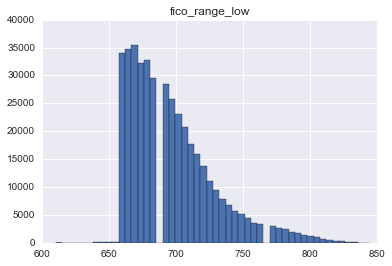

In [140]:
# Histogram of fico_range_low in 50 bins
# x-axis: fico_range_low
# y-axis: number of borrowers
BinaryLoanData.hist('fico_range_low', bins=50)

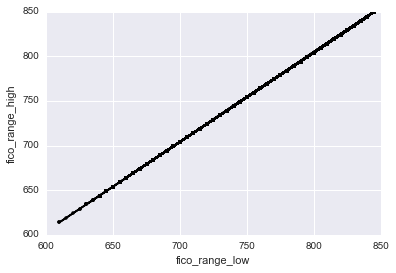

In [141]:
# Relationship between fico_range_low and fico_range_high
# x-axis: fico_range_low
# y-axis: fico_range_high
plt.plot(BinaryLoanData.fico_range_low, BinaryLoanData.fico_range_high, '.-k')
plt.xlabel('fico_range_low')
plt.ylabel('fico_range_high')

Its not surprising that lendingclub only approves application with fico score over 600 and the majority of applications having fico score over 650. Further exam of the data (didn't show here) indicates that loans with fico score between 600 and 650 are the one with `loan_status` "Does not meet the credit policy" but nevertheless issued. Thus `fico_range_low` has a right screwed distribution. There's a linear relationship between `fico_range_low` and `fico_range_high`, thus only one of them is needed in classification task.

To check whether fico score is indeed useful for the classification task, the following figure shows the boxplot of fico score comparing the binary loan status.

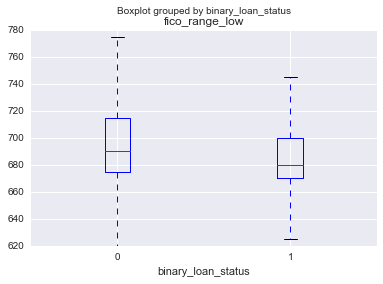

In [142]:
# Boxplot of fico_range_low comparing two binary_loan_status
# x-axis: binary_loan_status
# y-axis: fico_range_low
BinaryLoanData.boxplot(column='fico_range_low', by='binary_loan_status', showfliers=False)

According to the above boxplot, people who fully paid their loan (`binary_loan_status` == 0) has on average higher fico scores of around 690 than that from people who default (`binary_loan_status` == 1 and average fico score 680). Thus fico score is indeed a predicting factor of default. 

#### Representative categorical features
There are several categorical features that are useful for classification task, such as `term`, `home_ownership`, `grade`. In the following figure I select `term` and `grade` as representative categorical features to show that they have predicting power of loan default.

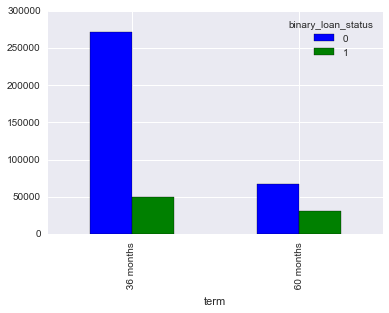

In [143]:
# Barplot of binary_loan_status comparing two different terms 
# x-axis: loan term - either 36 months or 60 months
# y-axis: number of borrowers in each binary_loan_status and term category
BinaryLoanData.groupby(['term', 'binary_loan_status']).size().unstack().plot(kind='bar', stacked=False)

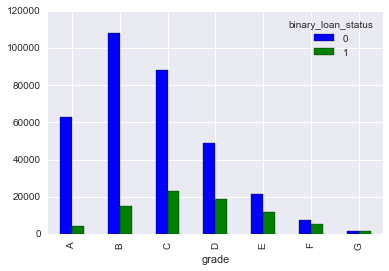

In [144]:
# Barplot of binary_loan_status comparing sever different grades from A to G
# x-axis: loan grade - from A to G
# y-axis: number of borrowers in each binary_loan_status and grade category
BinaryLoanData.groupby(['grade', 'binary_loan_status']).size().unstack().plot(kind='bar', stacked=False)

The above two barplots show that term and grade have predicting power over who default. The ratio of default is higher for loan term 60 months than 36 months; and the ratio of default increases with higher grade. 

### Algorithms and Techniques
In this section, you will need to discuss the algorithms and techniques you intend to use for solving the problem. You should justify the use of each one based on the characteristics of the problem and the problem domain. Questions to ask yourself when writing this section:
- _Are the algorithms you will use, including any default variables/parameters in the project clearly defined?_
- _Are the techniques to be used thoroughly discussed and justified?_
- _Is it made clear how the input data or datasets will be handled by the algorithms and techniques chosen?_

### Benchmark
In this section, you will need to provide a clearly defined benchmark result or threshold for comparing across performances obtained by your solution. The reasoning behind the benchmark (in the case where it is not an established result) should be discussed. Questions to ask yourself when writing this section:
- _Has some result or value been provided that acts as a benchmark for measuring performance?_
- _Is it clear how this result or value was obtained (whether by data or by hypothesis)?_


## III. Methodology
_(approx. 3-5 pages)_

### Data Preprocessing
In this section, all of your preprocessing steps will need to be clearly documented, if any were necessary. From the previous section, any of the abnormalities or characteristics that you identified about the dataset will be addressed and corrected here. Questions to ask yourself when writing this section:
- _If the algorithms chosen require preprocessing steps like feature selection or feature transformations, have they been properly documented?_
- _Based on the **Data Exploration** section, if there were abnormalities or characteristics that needed to be addressed, have they been properly corrected?_
- _If no preprocessing is needed, has it been made clear why?_

### Implementation
In this section, the process for which metrics, algorithms, and techniques that you implemented for the given data will need to be clearly documented. It should be abundantly clear how the implementation was carried out, and discussion should be made regarding any complications that occurred during this process. Questions to ask yourself when writing this section:
- _Is it made clear how the algorithms and techniques were implemented with the given datasets or input data?_
- _Were there any complications with the original metrics or techniques that required changing prior to acquiring a solution?_
- _Was there any part of the coding process (e.g., writing complicated functions) that should be documented?_

### Refinement
In this section, you will need to discuss the process of improvement you made upon the algorithms and techniques you used in your implementation. For example, adjusting parameters for certain models to acquire improved solutions would fall under the refinement category. Your initial and final solutions should be reported, as well as any significant intermediate results as necessary. Questions to ask yourself when writing this section:
- _Has an initial solution been found and clearly reported?_
- _Is the process of improvement clearly documented, such as what techniques were used?_
- _Are intermediate and final solutions clearly reported as the process is improved?_


## IV. Results
_(approx. 2-3 pages)_

### Model Evaluation and Validation
In this section, the final model and any supporting qualities should be evaluated in detail. It should be clear how the final model was derived and why this model was chosen. In addition, some type of analysis should be used to validate the robustness of this model and its solution, such as manipulating the input data or environment to see how the model’s solution is affected (this is called sensitivity analysis). Questions to ask yourself when writing this section:
- _Is the final model reasonable and aligning with solution expectations? Are the final parameters of the model appropriate?_
- _Has the final model been tested with various inputs to evaluate whether the model generalizes well to unseen data?_
- _Is the model robust enough for the problem? Do small perturbations (changes) in training data or the input space greatly affect the results?_
- _Can results found from the model be trusted?_

### Justification
In this section, your model’s final solution and its results should be compared to the benchmark you established earlier in the project using some type of statistical analysis. You should also justify whether these results and the solution are significant enough to have solved the problem posed in the project. Questions to ask yourself when writing this section:
- _Are the final results found stronger than the benchmark result reported earlier?_
- _Have you thoroughly analyzed and discussed the final solution?_
- _Is the final solution significant enough to have solved the problem?_


## V. Conclusion
_(approx. 1-2 pages)_

### Free-Form Visualization
In this section, you will need to provide some form of visualization that emphasizes an important quality about the project. It is much more free-form, but should reasonably support a significant result or characteristic about the problem that you want to discuss. Questions to ask yourself when writing this section:
- _Have you visualized a relevant or important quality about the problem, dataset, input data, or results?_
- _Is the visualization thoroughly analyzed and discussed?_
- _If a plot is provided, are the axes, title, and datum clearly defined?_

### Reflection
In this section, you will summarize the entire end-to-end problem solution and discuss one or two particular aspects of the project you found interesting or difficult. You are expected to reflect on the project as a whole to show that you have a firm understanding of the entire process employed in your work. Questions to ask yourself when writing this section:
- _Have you thoroughly summarized the entire process you used for this project?_
- _Were there any interesting aspects of the project?_
- _Were there any difficult aspects of the project?_
- _Does the final model and solution fit your expectations for the problem, and should it be used in a general setting to solve these types of problems?_

### Improvement
In this section, you will need to provide discussion as to how one aspect of the implementation you designed could be improved. As an example, consider ways your implementation can be made more general, and what would need to be modified. You do not need to make this improvement, but the potential solutions resulting from these changes are considered and compared/contrasted to your current solution. Questions to ask yourself when writing this section:
- _Are there further improvements that could be made on the algorithms or techniques you used in this project?_
- _Were there algorithms or techniques you researched that you did not know how to implement, but would consider using if you knew how?_
- _If you used your final solution as the new benchmark, do you think an even better solution exists?_

-----------

**Before submitting, ask yourself. . .**

- Does the project report you’ve written follow a well-organized structure similar to that of the project template?
- Is each section (particularly **Analysis** and **Methodology**) written in a clear, concise and specific fashion? Are there any ambiguous terms or phrases that need clarification?
- Would the intended audience of your project be able to understand your analysis, methods, and results?
- Have you properly proof-read your project report to assure there are minimal grammatical and spelling mistakes?
- Are all the resources used for this project correctly cited and referenced?
- Is the code that implements your solution easily readable and properly commented?
- Does the code execute without error and produce results similar to those reported?